In [7]:
#This was the code used for analysing, cleaning, and visualizing data that was extracted from articles that were used for writing a review paper 
#on creativity in ECEC (early childhood education settings).
#Unfortunately, I cannot share the whole database but here is the code and the resulting visualizations generated that were used to compute frequencies
#and create the visulaizations that are used in the paper.
#importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

#reading in the excel
df = pd.read_excel('CreativityConstructs_4August2022.xlsx', 1)

#dropping study id 6812 (as I was using an older excel which still had this)
df = df.drop(labels=166, axis=0)

#correcting some inconsistency where all instances of APS-P were not identical
df.at[142, 'Measure_Name'] = 'Affect in Play Scale-Preschool (APS-P)'
df.at[143, 'Measure_Name'] = 'Affect in Play Scale-Preschool (APS-P)'
df.at[146, 'Measure_Name'] = 'Affect in Play Scale-Preschool (APS-P)'
df.at[147, 'Measure_Name'] = 'Affect in Play Scale-Preschool (APS-P)'

#making curiosity box instances consistent
df.at[112, 'Measure_Name'] = 'Curiosity Box'

#changing COR-Music and COR-pretend play to have the same entry
df.at[206, 'Measure_Name'] = 'High/Scope Child Observation Record (COR)'
df.at[207, 'Measure_Name'] = 'High/Scope Child Observation Record (COR)'

#correcting inconsistencies with N/R, N/A and nan
df.at[297, 'Measure_Name'] = 'N/R'
df.at[298, 'Measure_Name'] = 'N/R'
df.at[70, 'Measure_Name'] = 'N/R'
df.at[71, 'Measure_Name'] = 'N/R'
df.at[72, 'Measure_Name'] = 'N/R'
df.at[4, 'Measure_Name'] = 'N/R'
df.at[115, 'Measure_Name'] = 'N/R'
df.at[204, 'Measure_Name'] = 'N/R'
df.at[205, 'Measure_Name'] = 'N/R'
df.at[348, 'Measure_Name'] = 'N/R'

#correcting inconsistencies in naming
df.at[345, 'Measure_Name'] = 'Adopted Scales for Rating the Behavioral Characteristics of Superior Students'
df.at[250, 'Measure_Name'] ='Storytelling Test '
df.at[271, 'Measure_Name'] ='N/R'
df.at[299, 'Measure_Name'] = 'TTCT Modified'
df.at[174, 'Measure_Name'] = 'Play Observation Scale'

In [9]:
#creating a list of all the unique measures
measures = df['Measure_Name'].to_list()
measures = list(dict.fromkeys(measures))

#creating a dictionary with the measure name as key and an array of the study ids where they are used as the value
dic = {}
for item in measures:
    dic[item] = df[df['Measure_Name'].isin([item])]['Study_ID'].to_list()

#creating another dictinary that uses the previous one to count how many studies each assessment occurs in
dic2 = {}
for key, value in dic.items():
    dic[key] = list(dict.fromkeys(value))
    dic2[key] = len(dic[key])

#finding and removing the assessments that occur in less than two studies from the first dictionary
rm = []
for key, value in dic.items():
    if len(value) < 2:
        rm.append(key)
for r in rm:
    dic.pop(r, None)

#modifying df to only have the assessmnets that are there in two or more studies
df = df[df['Measure_Name'].isin(dic.keys())]

#getting a list of outcome Ns for the measures and the list of measures in an descending order
outcome = df['Measure_Name'].value_counts().to_list()
measure = df['Measure_Name'].value_counts().index[:].to_list()

#getting a list of study N from the dictionary created above
studyn = []
for i in measure:
    studyn.append(len(dic[i]))

#creating the needed dataframe for creating the measures bar graph
for i in range(len(outcome)):
    outcome[i] = outcome[i] - studyn[i]
countgraph = pd.DataFrame(list(zip(studyn, outcome)), columns=['Study N','Outcome N'], index=measure)
countgraph

,Study N,Outcome N
TTCT,16,54
TCAM,11,26
Research Developed,10,21
N/R,17,12
Alternate Uses Task,9,11
TTCT Modified,3,9
High/Scope Child Observation Record (COR),2,9
Affect in Play Scale-Preschool (APS-P),2,7
Multidimensional Stimulus Fluency Measure,4,4
Instances Test,2,5


[Text(0, 0, 'TTCT'),
 Text(1, 0, 'TCAM'),
 Text(2, 0, 'Research Developed'),
 Text(3, 0, 'N/R'),
 Text(4, 0, 'Alternate Uses\n Task'),
 Text(5, 0, 'TTCT Modified'),
 Text(6, 0, 'High/Scope Child \nObservation Record (COR)'),
 Text(7, 0, 'Affect in Play \nScale-Preschool (APS-P)'),
 Text(8, 0, 'Multidimensional Stimulus\n Fluency Measure'),
 Text(9, 0, 'Instances Test'),
 Text(10, 0, 'Play Observation\n Scale'),
 Text(11, 0, 'Singer Pretend Play (1973)'),
 Text(12, 0, 'Test for Creative \nThinking-Drawing Production'),
 Text(13, 0, 'Dog and Bone\n Test'),
 Text(14, 0, 'Storytelling Test '),
 Text(15, 0, 'Curiosity Box')]

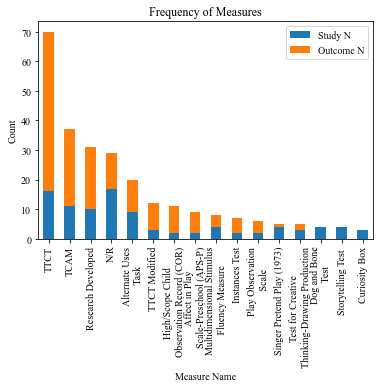

In [10]:
#creating the bra graph and also setting labels to have a line break when assessment name is too long
font = {'fontname' : 'Times New Roman'}
gr = countgraph.plot(kind='bar', stacked=True)
plt.xlabel('Measure Name')
plt.ylabel('Count')
plt.title('Frequency of Measures')
gr.set_xticklabels(['TTCT',
 'TCAM',
 'Research Developed',
 'N/R',
 'Alternate Uses\n Task',
 'TTCT Modified',
 'High/Scope Child \nObservation Record (COR)',
 'Affect in Play \nScale-Preschool (APS-P)',
 'Multidimensional Stimulus\n Fluency Measure',
 'Instances Test',
 'Play Observation\n Scale',
 'Singer Pretend Play (1973)',
 'Test for Creative \nThinking-Drawing Production',
 'Dog and Bone\n Test',
 'Storytelling Test ',
 'Curiosity Box'])

In [18]:
#making a list of the four categories/groups with a combined one for grooups 3, 4, and 5 for the bubble plots
gr1 = ['Imagination', 'Make Believe', 'Fantasy', 'Pretend Play', 'Dramatic Play', 'Abstractness of Titles', 'Constructive Imaginative Play']
gr2 = ['Fluency', 'Elaboration', 'Flexibility', 'Resistance to Premature Closure', 'Originality', 'Complexity', 'Innovation']
gr3 = ['Explore', 'Curiosity', 'Problem Solving', 'Creative Characteristics ', 'Creativity Total', 'Art', 'Expressive', 'Verbal Creativity']
gr33 = ['Explore', 'Curiosity', 'Problem Solving']
gr4 = ['Creative Characteristics ', 'Creativity Total']
gr5 = ['Art', 'Expressive', 'Verbal Creativity']
grallcon = ['Imagination', 'Make Believe', 'Fantasy', 'Pretend Play', 'Dramatic Play', 'Abstractness of Titles', 'Constructive Imaginative Play', 'Fluency', 'Elaboration', 'Flexibility', 'Resistance to Premature Closure', 'Originality', 'Complexity', 'Innovation', 'Explore', 'Curiosity', 'Problem Solving', 'Creative Characteristics ', 'Creativity Total', 'Art', 'Expressive', 'Verbal Creativity' ]

#making respective dataframes with only the outcomes in each group
gr1df = df[df['Final Construct'].isin(gr1)]
gr2df = df[df['Final Construct'].isin(gr2)]
gr3df = df[df['Final Construct'].isin(gr3)]
gr33df = df[df['Final Construct'].isin(gr33)]
gr4df = df[df['Final Construct'].isin(gr4)]
gr5df = df[df['Final Construct'].isin(gr5)]

#creating a function that is able to create the bubble plots for each group using a dataframe passed to it
def makebub1(thisdf, title):
    hi = thisdf[['Measure_Name', 'Final Construct']]
    constructs = hi['Final Construct'].values
    constructs = list(dict.fromkeys(constructs))
    mes = thisdf['Measure_Name'].tolist()
    mes = list(dict.fromkeys(mes))
    mes.remove('N/R')
    mes.remove('Research Developed')
    one = []
    for item in mes:
        for i in range(len(constructs)):
             one.append(item)
    two = []
    for i in range(len(mes)):
        two.extend(constructs)
    heat = pd.DataFrame()
    heat['Measure'] = one
    heat['Construct'] = two
    conunt = []
    for i in range(len(one)):
        ctr = 0
        for j in hi.index.values.tolist():
            if (one[i] == hi.at[j, 'Measure_Name']) and (two[i] == hi.at[j, 'Final Construct']):
                ctr = ctr + 1
        conunt.append(ctr)
    heat['Count'] = conunt
    bubplot = plt.figure(figsize = (5, 5))
    bubplot = sns.scatterplot(data=heat, x='Measure', y='Construct', size='Count', sizes=(0, 1500), alpha=0.7)
    bubplot.legend(bbox_to_anchor=(1.05, 1), prop={'size': 10}, labelspacing = 2, frameon= False)
    plt.title(title)
    plt.xticks(rotation=90) 
    plt.show()
    return [item.get_text() for item in bubplot.get_xticklabels()], [item.get_text() for item in bubplot.get_yticklabels()]

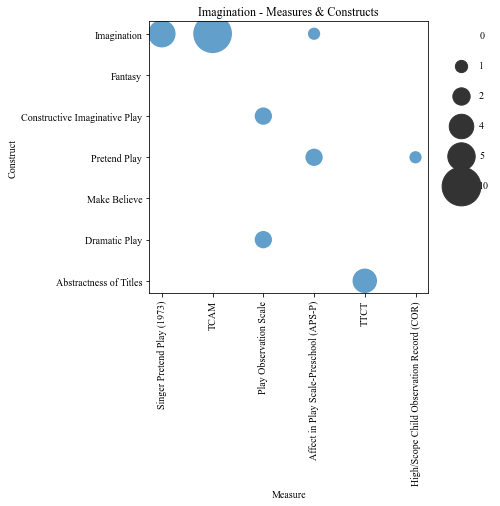

(['Singer Pretend Play (1973)',
  'TCAM',
  'Play Observation Scale',
  'Affect in Play Scale-Preschool (APS-P)',
  'TTCT',
  'High/Scope Child Observation Record (COR)'],
 ['Imagination',
  'Fantasy',
  'Constructive Imaginative Play',
  'Pretend Play',
  'Make Believe',
  'Dramatic Play',
  'Abstractness of Titles'])

In [25]:
#bubble plot for group 1 (in the paper figure an extra step was used to add line breaks to the labels when two long and set titles)
makebub1(gr1df, 'Imagination - Measures & Constructs')

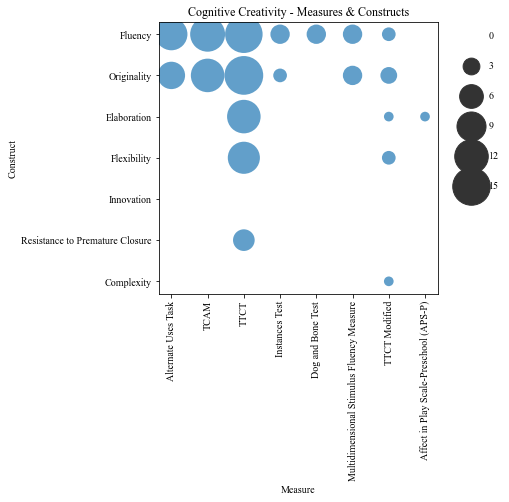

(['Alternate Uses Task',
  'TCAM',
  'TTCT',
  'Instances Test',
  'Dog and Bone Test',
  'Multidimensional Stimulus Fluency Measure',
  'TTCT Modified',
  'Affect in Play Scale-Preschool (APS-P)'],
 ['Fluency',
  'Originality',
  'Elaboration',
  'Flexibility',
  'Innovation',
  'Resistance to Premature Closure',
  'Complexity'])

In [19]:
#bubble plot for group 2 (in the paper figure an extra step was used to add line breaks to the labels when two long and set titles)
makebub1(gr2df, 'Cognitive Creativity - Measures & Constructs')

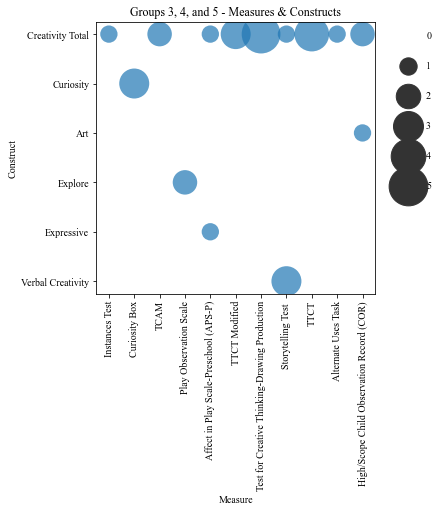

(['Instances Test',
  'Curiosity Box',
  'TCAM',
  'Play Observation Scale',
  'Affect in Play Scale-Preschool (APS-P)',
  'TTCT Modified',
  'Test for Creative Thinking-Drawing Production',
  'Storytelling Test ',
  'TTCT',
  'Alternate Uses Task',
  'High/Scope Child Observation Record (COR)'],
 ['Creativity Total',
  'Curiosity',
  'Art',
  'Explore',
  'Expressive',
  'Verbal Creativity'])

In [30]:
#bubble plot for group 3, 4, and 5 (in the paper figure an extra step was used to add line breaks to the labels when two long and set titles + further photoediting 
# to create lines to subdivide by respective groups and switch art and explore so that explore and curiosity can be togehter)
makebub1(gr3df, 'Groups 3, 4, and 5 - Measures & Constructs')